In [2]:
%matplotlib inline
import matplotlib.pyplot as pp
import numpy as np
from math import sqrt

## Heavy Ball Method

Assume the following quadratic equation:
$$ f(x) = \frac{1}{2} x^{T} A x + b x $$

The heavy ball iteration:
$$ x_{k+1} = x_k - \alpha ( A x_k + b ) + \beta (x_k - x_{x-1})$$
Remark: [See exercise 1.3.8 in Bertsekas 2016]

As a linear iteration:
$$\begin{pmatrix} x_{k+1} \\ x_k \end{pmatrix} = \begin{pmatrix} (1+\beta) I - \alpha A & -\beta I \\ I & 0 \end{pmatrix} \begin{pmatrix} x_{k} \\ x_{k-1} \end{pmatrix} - \begin{pmatrix} \alpha b \\ 0 \end{pmatrix} = F \begin{pmatrix} x_{k} \\ x_{k-1} \end{pmatrix} - f $$

The eigenvalues $\lambda$ of matrix $F$ satisfy:
$$ \lambda^2 + (\alpha \cdot \xi - 1 - \beta) \lambda + \beta = 0$$
where $\xi$ are eigenvalues of $A$

The modified linear equation (<b>heavy ball 2</b>) is:
$$\begin{pmatrix} x_{k+1} \\ \sqrt{\beta} x_k \end{pmatrix} = \begin{pmatrix} (1+\beta) I - \alpha A & -\sqrt{\beta} I \\ \sqrt{\beta} I & 0 \end{pmatrix} \begin{pmatrix} x_{k} \\ \sqrt{\beta} x_{k-1} \end{pmatrix} - \begin{pmatrix} \alpha b \\ 0 \end{pmatrix} $$


In [3]:
def heavyball_mat(A, b, alpha, beta):
    I = np.eye(A.shape[0])
    Z = np.zeros(A.shape)
    return np.vstack((np.hstack(( (1+beta)*I - alpha * A, -beta * I )), \
                   np.hstack((           I ,                 Z   ))) ), \
                        np.row_stack((alpha * b, np.zeros(b.shape)))

def heavyball2_mat(A, b, alpha, beta):
    I = np.eye(A.shape[0])
    Z = np.zeros(A.shape)
    return np.vstack((np.hstack(( (1+beta)*I - alpha * A, - sqrt(beta) * I )), \
                   np.hstack((           sqrt(beta) * I ,               Z   ))) ), \
                        np.row_stack((alpha * b, np.zeros(b.shape)))


## Nesterov Method

Assume the following quadratic equation:
$$ f(x) = \frac{1}{2} x^{T} A x + b x $$

The constant step general Nesterov iteration ( (2.2.11) in [Nesterov 2004]) is:
$$ \begin{aligned}
x_{k+1} &= y_k - \alpha \nabla f(y_k) \\
y_{k+1} &= x_{k+1} + \beta (x_{k+1} - x_k)
\end{aligned} $$
where $\alpha=1/L$ and $\beta=\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{u}}$

The Nesterov iteration for the quadratic function above is:
$$ \begin{aligned}
x_{k+1} &= y_k - \alpha (A y_k + b) = (I - \alpha A) y_k - \alpha b \\
y_{k+1} &= x_{k+1} + \beta (x_{k+1} - x_k) = (1+\beta) x_{k+1} - \beta x_k \\
   &= (1+\beta) (I - \alpha A) y_k - \alpha (1+\beta) b - \beta x_k
\end{aligned} $$
Writing this as a linear iteration:
$$ \begin{pmatrix} y_{k+1} \\ x_{k+1} \end{pmatrix} = \begin{pmatrix} (1+\beta) (I - \alpha A) & -\beta I \\ (I-\alpha A) & 0 \end{pmatrix} \begin{pmatrix} y_k \\ x_k \end{pmatrix} - \begin{pmatrix} (1+\beta) \alpha b \\ \alpha b \end{pmatrix} $$

In [4]:
def nesterov_mat(A, b, alpha, beta):
    I = np.eye(A.shape[0])
    Z = np.zeros(A.shape)
    return np.vstack((np.hstack(( (1+beta) * (I - alpha*A), -beta * I )), \
                   np.hstack((               (I - alpha*A) ,   Z   ))) ), \
                        np.row_stack(((1+beta)* alpha * b, alpha * b) )

## Special Matrices

Examples of the stochastic transition matrices $P$. The linear equation being solved is $I - \gamma P = b$. 

1a) Eigenvalues $\lambda \in \{1,-1\}$: (reflection)
$$ P_{11} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

1b) The same eigenvalues, but symmetric and non-stochastic:
$$ P_{12} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

1c) The same eigenvalues, but symmetric (still stochastic):
$$ P_{13} = \begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{pmatrix}$$


2) Non-diagonalizable (reducible):
$$ P_{21} = \begin{pmatrix} 1/2 & 1/2 & 0 \\ 0 & 1/2 & 1/2 \\ 0 & 0 & 1 \end{pmatrix}$$

3a) Complex eigenvalues:
$$ P_{31} = \begin{pmatrix} 0.6 & 0.3 & 0.1 \\ 0.1 & 0.6 & 0.3 \\ 0.3 & 0.1 & 0.6 \end{pmatrix} $$

3b) Complex and large eigenvalues:
$$ P_{32} = \begin{pmatrix} 0 & 1 & 0  & 0 & 0 \\ 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0.6 & 0.3 & 0.1 \\ 0 & 0 & 0.1 & 0.6 & 0.3 \\ 0 & 0 & 0.3 & 0.1 & 0.6 \end{pmatrix} $$

In [5]:
gamma = 0.9
b = np.array([1,2])

P11 = np.array([[0,1],[1,0]], dtype=float)
P12 = np.array([[1,0],[0,-1]], dtype=float)
P13 = np.array([[0,1,0],[1,0,0],[0,0,1]], dtype=float)
P21 = np.array([[0.5, 0.5, 0], [0, 0.5, 0.5], [0, 0, 1]])
P31 = np.array([[0.6,0.3,0.1],[0.1,0.6,0.3],[0.3,0.1,0.6]])
P32 = np.array([[0,1,0,0,0],[1,0,0,0,0],[0,0,0.6,0.3,0.1],[0,0,0.1,0.6,0.3],[0,0,0.3,0.1,0.6]])

In [6]:
print('"Optimal" beta:', (1 - sqrt(1-gamma))**2)
print('"Optimal" convergence rate:', 1 - sqrt(1-gamma))

"Optimal" beta: 0.4675444679663242
"Optimal" convergence rate: 0.6837722339831621


In [7]:
def iteration_matrices(P, b, alpha=1, beta = 0.4):
    I = np.eye(P.shape[0])
    A = I - gamma*P    
    Qh,qh = heavyball_mat(A, b, alpha, beta)
    Qh2,qh2 = heavyball2_mat(A, b, alpha, beta)
    Qn,qn = nesterov_mat(A, b, alpha, beta)
    print('Heavy ball eigenvalues:', np.sort(np.abs(np.linalg.eig(Qh)[0])))
    print('Heavy ball 2 eigenvalues:', np.sort(np.abs(np.linalg.eig(Qh2)[0])))
    print('Nesterov eigenvalues:', np.sort(np.abs(np.linalg.eig(Qn)[0])))

In [8]:
from math import sqrt
iteration_matrices(P32, b, beta= (1 - sqrt(1-gamma))**2)

Heavy ball eigenvalues: [0.59332172 0.59332172 0.68377222 0.68377223 0.68377223 0.68377223
 0.68377223 0.68377224 0.78801172 0.78801172]
Heavy ball 2 eigenvalues: [0.59332172 0.59332172 0.68377223 0.68377223 0.68377223 0.68377223
 0.68377223 0.68377223 0.78801172 0.78801172]
Nesterov eigenvalues: [0.26530018 0.35840929 0.35840929 0.51175603 0.51175603 0.53657438
 0.53657438 0.78421564 0.78421564 1.5860902 ]


In [9]:
def optimize_coefficients(P, b, gamma, method='heavy'):
    I = np.eye(P.shape[0])
    A = I - gamma*P
    minval = 10 # minimal coefficient
    for alpha in np.arange(0.01,1,0.01):
        for beta in np.arange(0.01,2,0.01):
            if method == 'nesterov':
                Q,q = nesterov_mat(A, b, alpha, beta)
            elif method == 'heavy':
                Q,q = heavyball_mat(A, b, alpha, beta)
            else: assert False
                
            z = np.max(np.abs(np.linalg.eig(Q)[0]))
            if z < minval:
                minval = z
                minalpha = alpha
                minbeta = beta
            
    return minval, minalpha, minbeta

In [10]:
# numerically compute the optimal coeeficients
optimize_coefficients(P21, b, gamma)

(0.6855654600401047, 0.99, 0.47000000000000003)

In [11]:
from math import sqrt
M = 1 + 0.9
m = 1 - 0.9
(sqrt(M) - sqrt(m))/(sqrt(M) + sqrt(m)), (M - m)/(M + m)

(0.6267890062732586, 0.8999999999999999)

## Evolution of Eigenvalues (Heavy Ball)

(-1.2, 1.2)

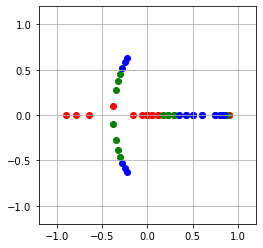

In [12]:
P = P13
alpha = 1

fall = []
for beta in np.arange(0,0.5,0.05):
    I = np.eye(P.shape[0])
    A = I - gamma*P    
    Q, q = heavyball_mat(A, b, alpha, beta)
    
    f = np.linalg.eig(Q)[0]
    fall.extend(f)

l = len(fall) // 3
pp.scatter(np.real(fall[:l]), np.imag(fall[:l]), color='red')
pp.scatter(np.real(fall[l:2*l]), np.imag(fall[l:2*l]), color='green')
pp.scatter(np.real(fall[2*l:]), np.imag(fall[2*l:]), color='blue')
pp.grid(True)
pp.axis("square")
pp.xlim([-1.2,1.2])
pp.ylim([-1.2,1.2])

(-0.1, 0.1)

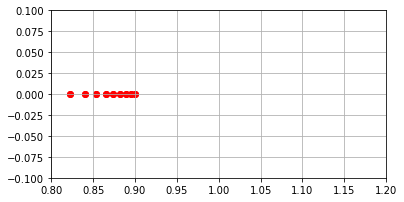

In [16]:
l = len(fall) // 3
pp.scatter(np.real(fall[:l]), np.imag(fall[:l]), color='red')
pp.scatter(np.real(fall[l:2*l]), np.imag(fall[l:2*l]), color='green')
pp.scatter(np.real(fall[2*l:]), np.imag(fall[2*l:]), color='blue')
pp.grid(True)
pp.axis("square")
pp.xlim([0.8,1.2])
pp.ylim([-0.1,0.1])

## Evolution of Eigenvalues (Nesterov)

(-1.2, 1.2)

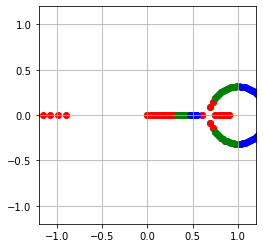

In [14]:
P = P13
alpha = 1

fall = []
for beta in np.arange(0,2,0.05):
    I = np.eye(P.shape[0])
    A = I - gamma*P    
    Q, q = nesterov_mat(A, b, alpha, beta)
    
    f = np.linalg.eig(Q)[0]
    fall.extend(f)

l = len(fall) // 3
pp.scatter(np.real(fall[:l]), np.imag(fall[:l]), color='red')
pp.scatter(np.real(fall[l:2*l]), np.imag(fall[l:2*l]), color='green')
pp.scatter(np.real(fall[2*l:]), np.imag(fall[2*l:]), color='blue')
pp.grid(True)
pp.axis("square")
pp.xlim([-1.2,1.2])
pp.ylim([-1.2,1.2])

(-0.1, 0.1)

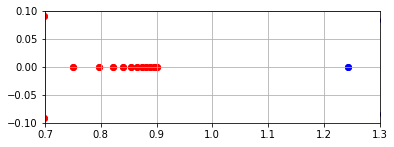

In [15]:
l = len(fall) // 3
pp.scatter(np.real(fall[:l]), np.imag(fall[:l]), color='red')
pp.scatter(np.real(fall[l:2*l]), np.imag(fall[l:2*l]), color='green')
pp.scatter(np.real(fall[2*l:]), np.imag(fall[2*l:]), color='blue')
pp.grid(True)
pp.axis("square")
pp.xlim([0.7,1.3])
pp.ylim([-0.1,0.1])